# Value at Risk (VaR)

## Variance-covariance: assume return is normal distribution

In [11]:
from scipy.stats import norm
import numpy as np
import quandl

def var_cov_var(P, c, mu, sigma):
    alpha = norm.ppf(1-c, mu, sigma)
    return P - P*(alpha + 1)
if __name__ == "__main__":
    start = "2010-01-01"
    end = "2014-01-01"
    citi = quandl.get("WIKI/C", start_date = start, end_date = end, api_key = "**")
    #Citi group
    citi["rets"] = citi["Adj. Close"].pct_change()
    P = 1e6 # 1,000,000 USD
    c = 0.99 # 99% confidence interval
    mu = np.mean(citi["rets"])
    sigma = np.std(citi["rets"])
    var = var_cov_var(P, c, mu, sigma)
    print("Value-at-Risk: $%0.2f" % var)

Value-at-Risk: $56401.08


## Historical Simulation Method (HSM)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
 
style.use('ggplot')
#==============================================================================
 
def single_asset_var(symbol,start, end):
    #Get data from quandl
    data = quandl.get(symbol, start_date = start, end_date = end, api_key = "**").sort_index()
    
    #Calculate returns
    rets = data.pct_change()
    rets = rets.dropna(how = 'any') 
    
    #Sort Returns in Ascending Order
    sorted_rets = sorted(rets["Close"])
    
    varg = np.percentile(sorted_rets, 5)
    
    #Output histogram
    plt.hist(sorted_rets,density = True)
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.title(r'Histogram of Asset Returns', fontsize=18, fontweight='bold')
    plt.axvline(x=varg, color='r', linestyle='--', label='95% Confidence VaR: ' + "{0:.2f}%".format(varg * 100))
    plt.legend(loc='upper right', fontsize = 'x-small')
    plt.show()  
    
    #VaR stats
    print("99.99% Confident the actual loss will not exceed: " , "{0:.2f}%".format(np.percentile(sorted_rets, .01) * 100))
    print("99% Confident the actual loss will not exceed: " + "{0:.2f}%".format(np.percentile(sorted_rets, 1) * 100))
    print("95% Confident the actual loss will not exceed: " + "{0:.2f}%".format(np.percentile(sorted_rets, 5) * 100))
    
    print("Losses expected to exceed " + "{0:.2f}%".format(np.percentile(sorted_rets, 5) * 100) + " " + str(.05*len(rets)) + " out of " + str(len(rets)) + " days")

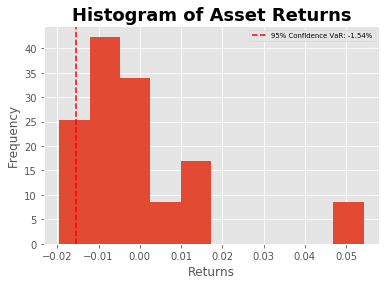

99.99% Confident the actual loss will not exceed:  -1.95%
99% Confident the actual loss will not exceed: -1.87%
95% Confident the actual loss will not exceed: -1.54%
Losses expected to exceed -1.54% 0.8 out of 16 days


In [21]:
single_asset_var('WIKI/C', '2015-01-01', '2017-01-01')